<a href="https://colab.research.google.com/github/Amruthavalli-k/PowerOpt/blob/LinearReg_With_transformations/V2_Energy_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **Loading the dataset**

In [2]:
df = pd.read_csv('/content/Steel_industry_dataset.csv')
df.head()

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01-01-2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01-01-2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01-01-2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01-01-2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01-01-2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


### **Dataset Columns:**

**date:** Timestamp of the data record (e.g., "01/01/2018 00:15").

**Usage_kWh:** Energy consumption in kilowatt-hours.

**Lagging_Current_Reactive.Power_kVarh:** Reactive power with a lagging current in kilovolt-ampere reactive hours.

**Leading_Current_Reactive.Power_kVarh:** Reactive power with a leading current in kilovolt-ampere reactive hours.

**CO2:** Carbon dioxide emissions in metric tons.

**Lagging_Current_Power_Factor**: Power factor for lagging current.

**Leading_Current_Power_Factor:** Power factor for leading current.

**NSM:** Numeric time indicator (possibly in seconds).

**WeekStatus:** Whether the day is a "Weekday" or "Weekend".

**Day_of_week:** Day of the week (e.g., "Monday").

**Load_Type:** Type of load (e.g., "Light_Load").

In [3]:
#Summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2                                   35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [4]:
df.shape

(35040, 11)

In [5]:
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive_Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [6]:
# Descriptive Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Usage_kWh,35040.0,27.386892,33.444380,0.0,3.20,4.57,51.2375,157.18
Lagging_Current_Reactive_Power_kVarh,35040.0,13.035384,16.306000,0.0,2.30,5.00,22.6400,96.91
Leading_Current_Reactive_Power_kVarh,35040.0,3.870949,7.424463,0.0,0.00,0.00,2.0900,27.76
CO2,35040.0,0.011524,0.016151,0.0,0.00,0.00,0.0200,0.07
Lagging_Current_Power_Factor,35040.0,80.578056,18.921322,0.0,63.32,87.96,99.0225,100.00
Leading_Current_Power_Factor,35040.0,84.367870,30.456535,0.0,99.70,100.00,100.0000,100.00
NSM,35040.0,42750.000000,24940.534317,0.0,21375.00,42750.00,64125.0000,85500.00


## **Data Preprocessing**

### **Handling Missing Values**

In [7]:
  df.isna().sum()

,0
date,0
Usage_kWh,0
Lagging_Current_Reactive_Power_kVarh,0
Leading_Current_Reactive_Power_kVarh,0
CO2,0
Lagging_Current_Power_Factor,0
Leading_Current_Power_Factor,0
NSM,0
WeekStatus,0
Day_of_week,0


In [8]:
#Removing Null values
df.dropna(inplace =True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2                                   35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [9]:
#Analysing Unique Values of each column
for column in df.columns:
    print(f"Unique values in column '{column}': {df[column].unique()}")

Unique values in column 'date': ['01-01-2018 00:15' '01-01-2018 00:30' '01-01-2018 00:45' ...
 '31-12-2018 23:30' '31-12-2018 23:45' '31-12-2018 00:00']
Unique values in column 'Usage_kWh': [ 3.17  4.    3.24 ... 21.89 17.82 45.  ]
Unique values in column 'Lagging_Current_Reactive_Power_kVarh': [ 2.95  4.46  3.28 ... 69.77 74.56 70.67]
Unique values in column 'Leading_Current_Reactive_Power_kVarh': [ 0.    0.18 15.66 16.96 21.28 19.22 16.88 22.32 18.   16.92 23.4   5.65
  4.82  6.7   4.57 12.89 23.15 16.67 16.63 23.33 16.74 16.99 18.25 22.1
 16.7  19.33 21.35 16.81 20.45 20.77 21.64 19.19 23.51 17.39 17.35  8.96
  5.47 16.24 22.57 20.74 20.88 22.54 19.55 17.42 24.26 17.75 25.2  17.5
 10.08  0.07  0.11  0.94  1.15  0.54  0.14 18.9  25.92 25.34 25.49  6.52
  1.04  0.5   1.58  0.43  1.37  0.47  3.96 12.13 23.22 25.16 26.5  26.42
 26.46 15.44  0.04 26.21 25.56 25.74  6.08  1.69  1.94  0.79  1.66  1.22
  6.98 23.83 24.8  26.82 26.78 15.16 18.79 26.39 26.89  1.19  3.46  2.12
  2.77 24.08 25.

## **Exploratory Data Analysis(EDA)**

### **Univariate Analysis**

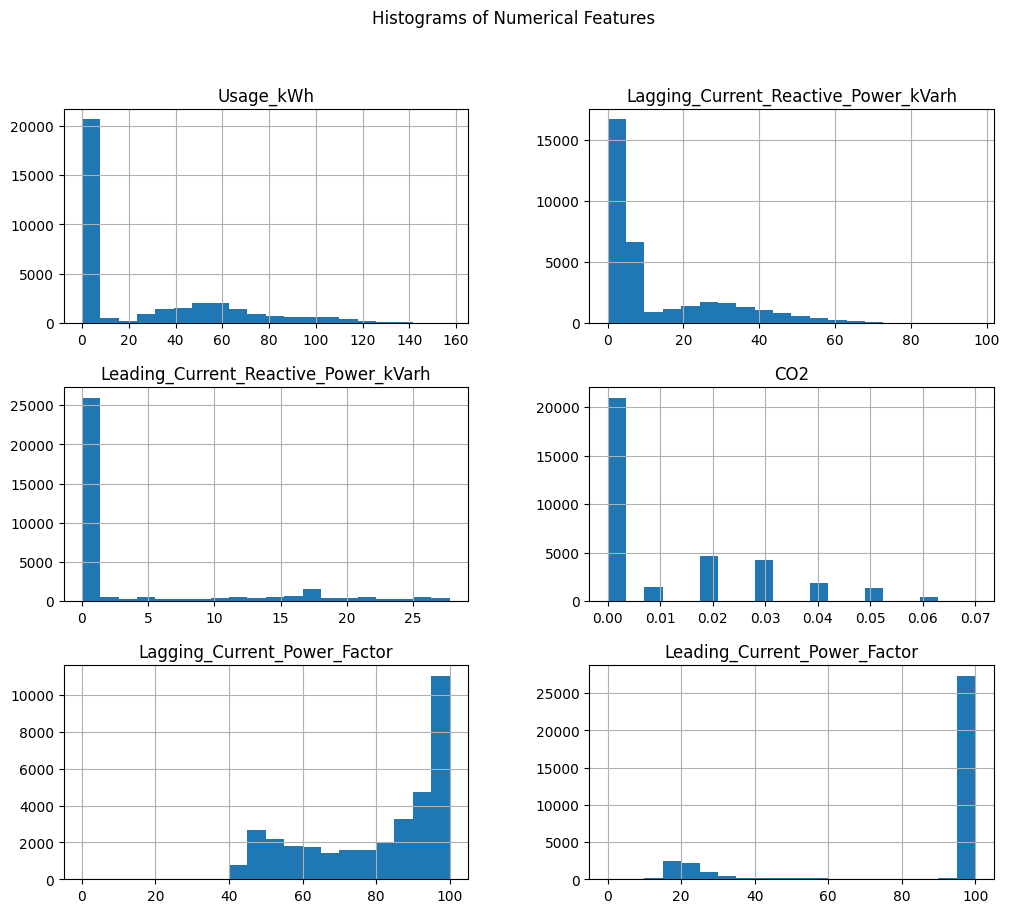

In [10]:
numerical_cols = ['Usage_kWh', 'Lagging_Current_Reactive_Power_kVarh',
                  'Leading_Current_Reactive_Power_kVarh', 'CO2',
                  'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor']

# Histograms
df[numerical_cols].hist(bins=20, figsize=(12, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

**Usage_kWh**: Most energy usage is below 20 kWh, indicating low consumption for most records.

Lagging_Current_Reactive_Power_kVarh: Reactive power is concentrated below 20 kVarh, with few higher values.

Leading_Current_Reactive_Power_kVarh: Values are mostly near 0, with minimal occurrences of higher reactive power.

CO2: CO2 emissions are predominantly low, peaking around 0.01 metric tons.

Lagging_Current_Power_Factor: Power factors are mostly efficient, ranging from 40% to 100%.

Leading_Current_Power_Factor: Almost all leading power factors are near 100%, showing high efficiency.

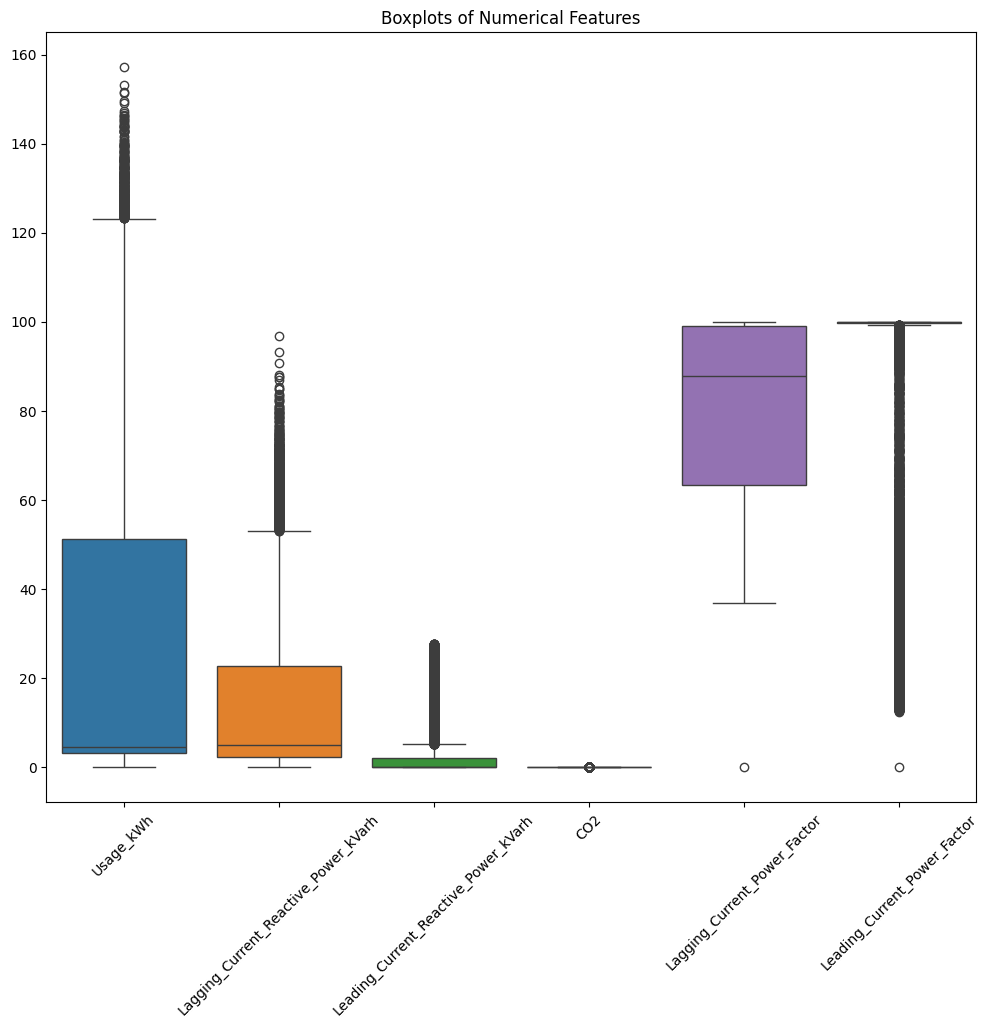

In [11]:
# Boxplot for outliers detection
plt.figure(figsize=(12, 10))
sns.boxplot(data=df[numerical_cols])
plt.title('Boxplots of Numerical Features')
plt.xticks(rotation=45)
plt.show()


Usage_kWh: The energy usage shows a wide range, with most values below 40 kWh, though there are several outliers above 100 kWh.

Lagging_Current_Reactive_Power_kVarh: Reactive power is concentrated below 20 kVarh, with numerous outliers extending beyond.

Leading_Current_Reactive_Power_kVarh: The values are tightly clustered around lower ranges, with minimal spread and few outliers.

CO2: CO2 emissions are consistently low, with negligible variability and a few outliers.

Lagging_Current_Power_Factor: Power factor distribution is skewed toward higher efficiency, with most values above 60%.

Leading_Current_Power_Factor: The leading power factor is consistently high, clustered near the maximum efficiency with some outliers.

Load_Type
Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: count, dtype: int64


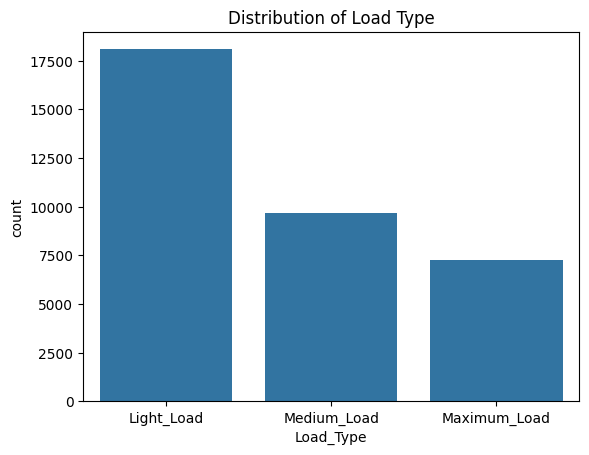

In [12]:
# Frequency count of categorical variable Load_Type
print(df['Load_Type'].value_counts())

# Visualizing Load_Type distribution
sns.countplot(x='Load_Type', data=df)
plt.title('Distribution of Load Type')
plt.show()


Light Load is the most common, with 18,072 instances, suggesting that the system operates predominantly under minimal load conditions.

Medium Load occurs less frequently, with 9,696 instances, indicating moderate system utilization.

Maximum Load is the least frequent, with 7,272 instances, highlighting that the system rarely reaches peak load conditions.

<ipython-input-13-3df65ce7d86c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


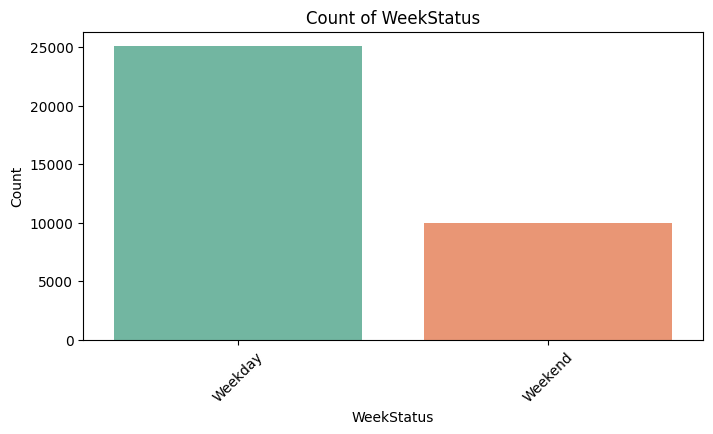

<ipython-input-13-3df65ce7d86c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


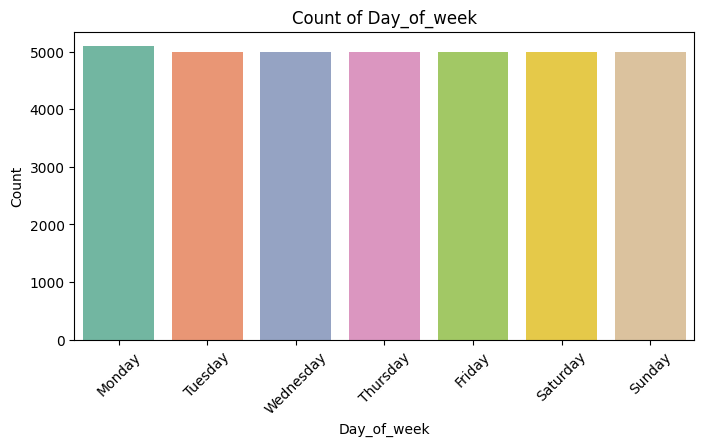

<ipython-input-13-3df65ce7d86c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


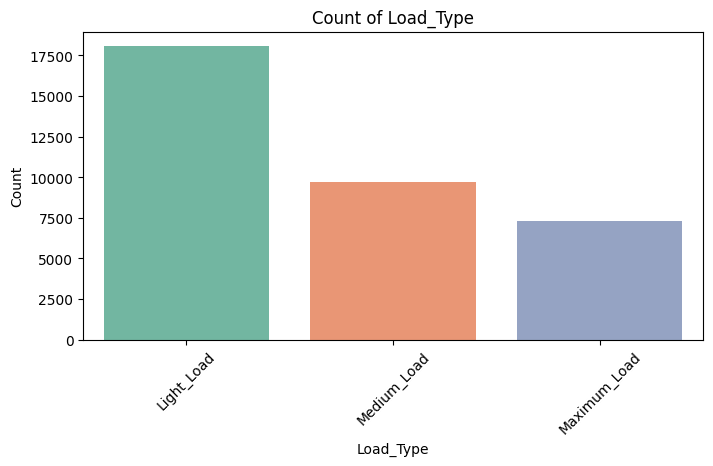

In [13]:
categorical_columns = ['WeekStatus', 'Day_of_week', 'Load_Type']

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

## **Bivariate Analysis**

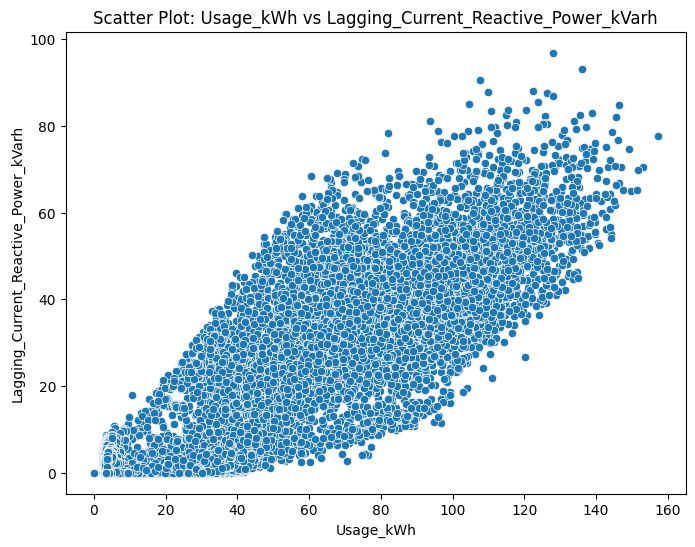

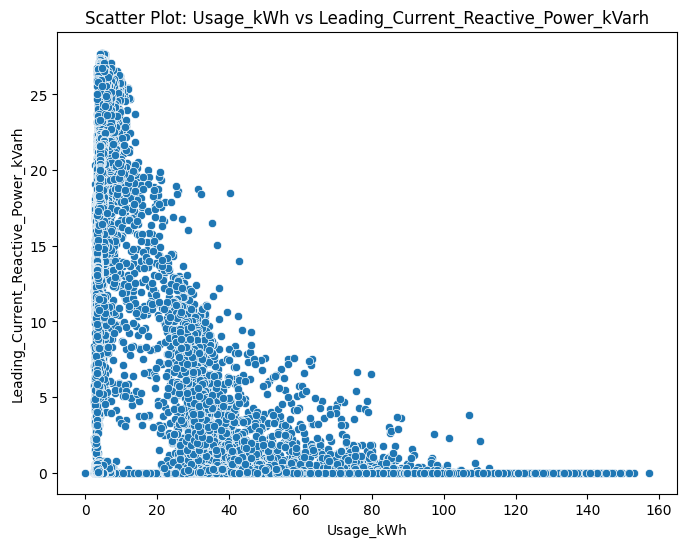

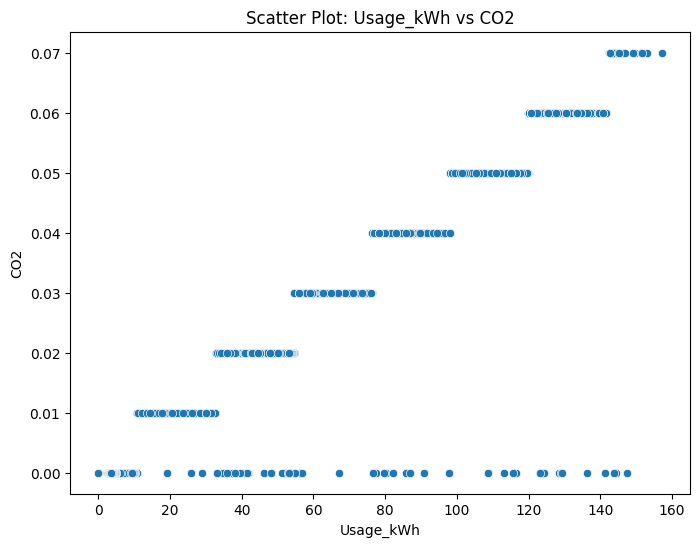

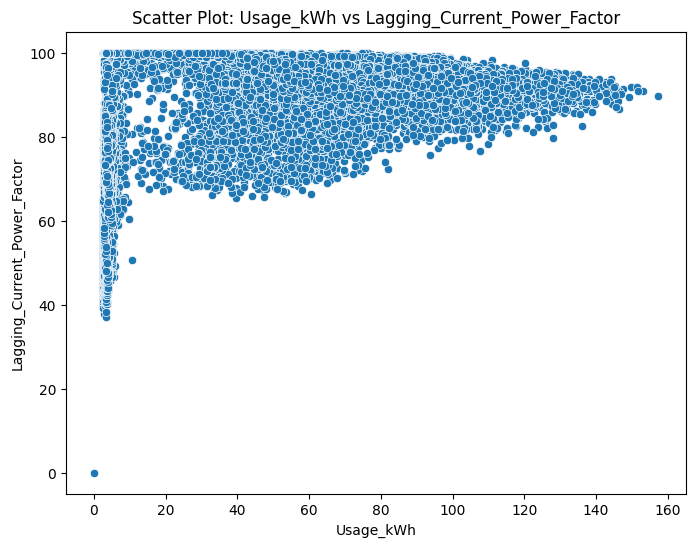

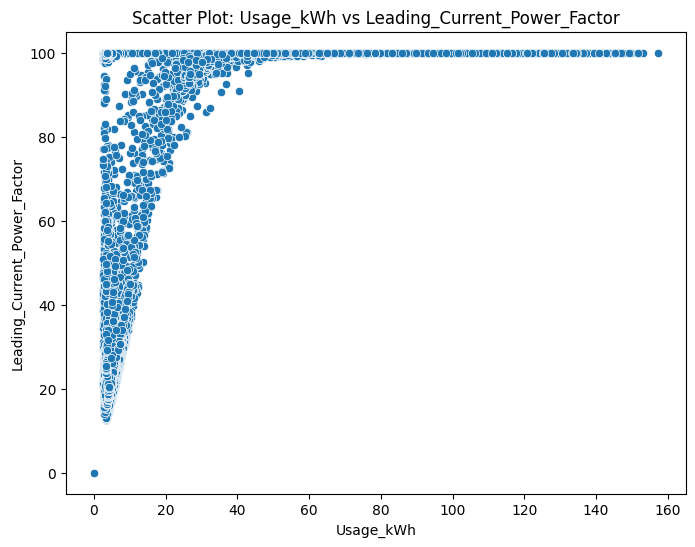

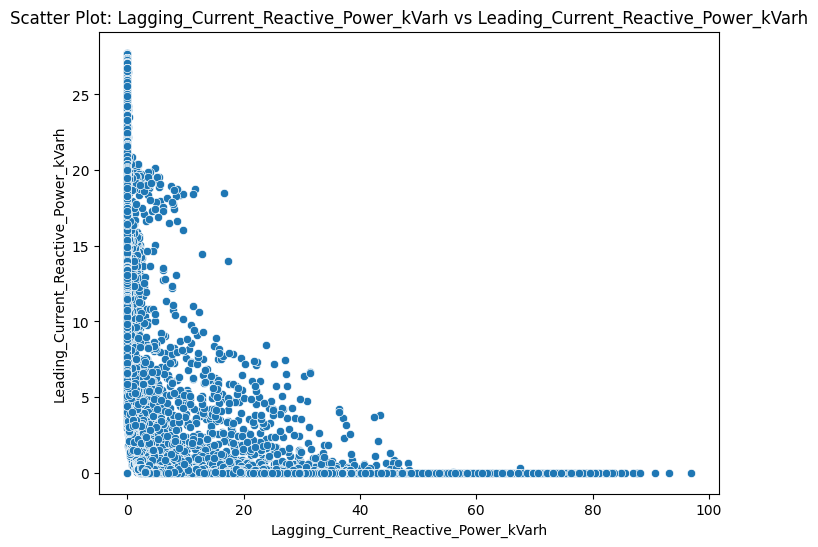

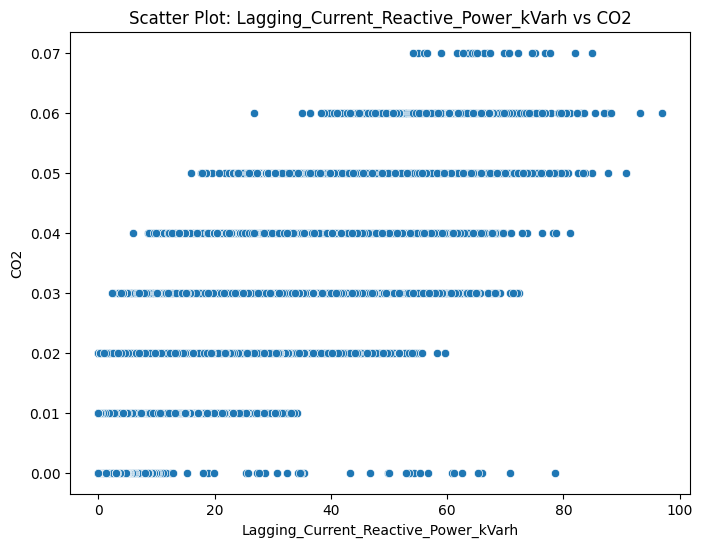

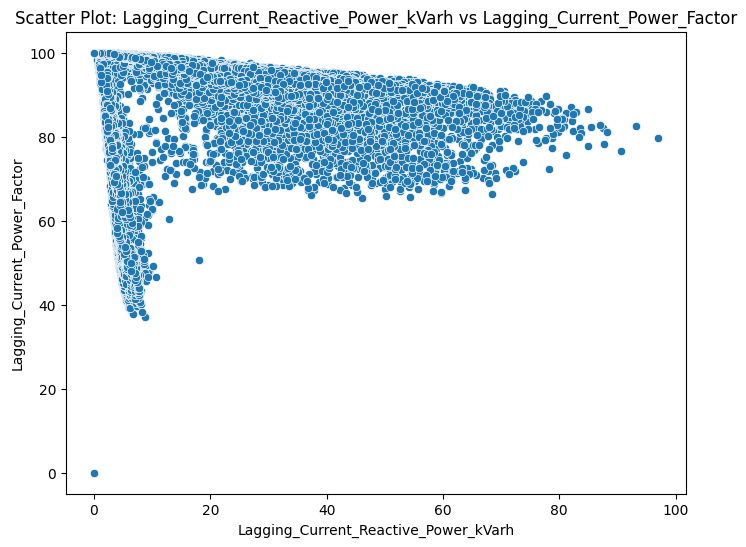

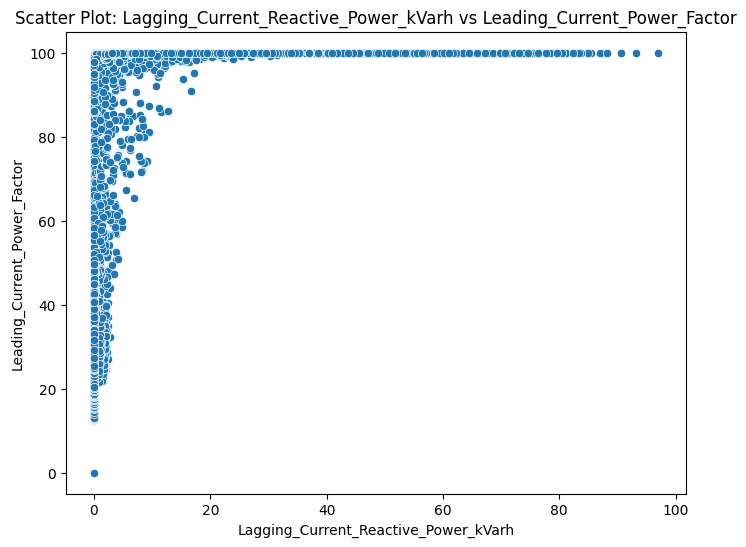

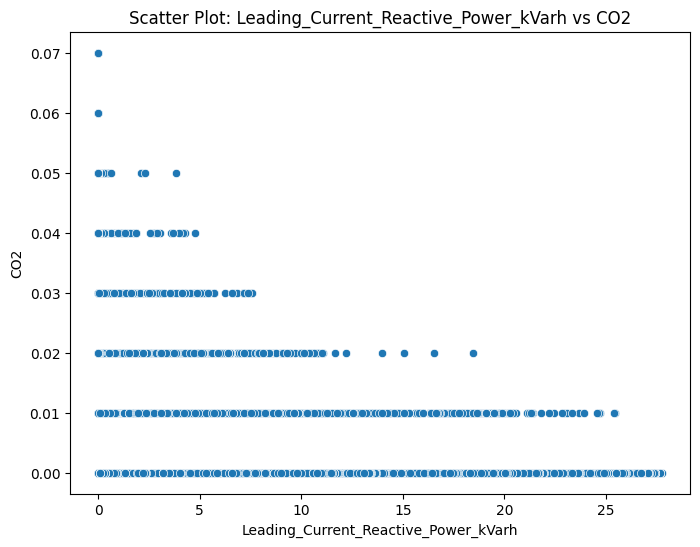

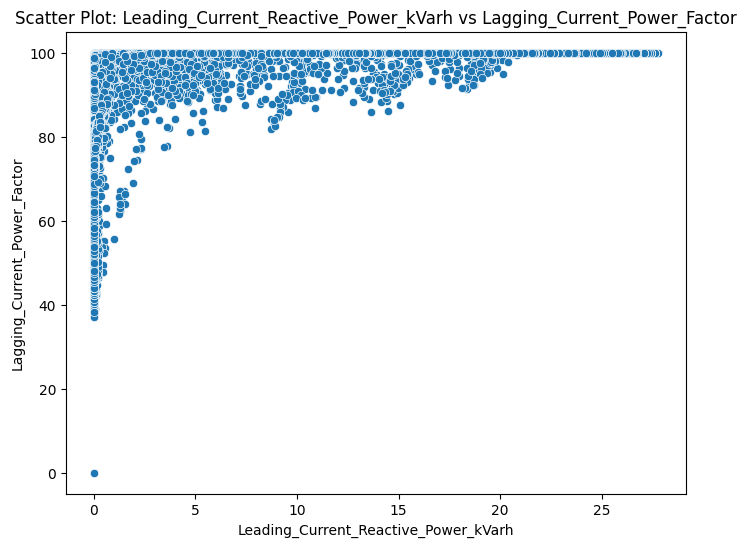

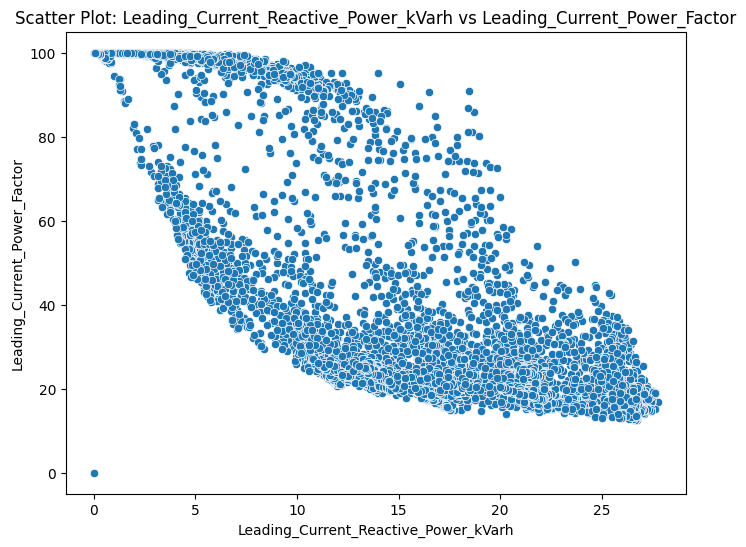

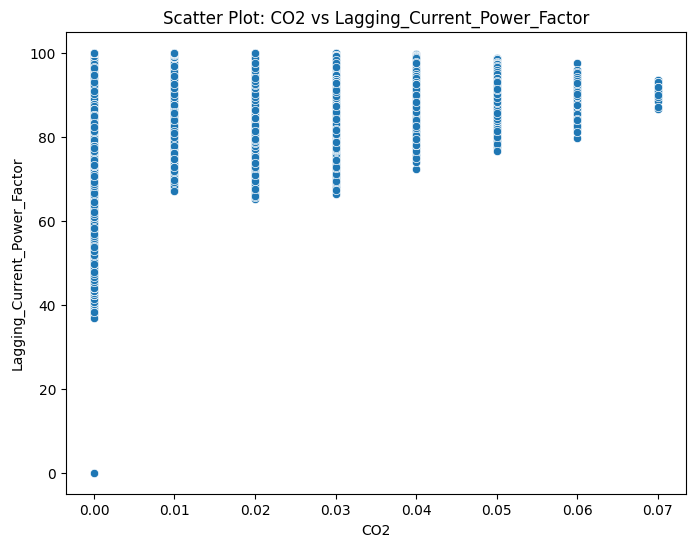

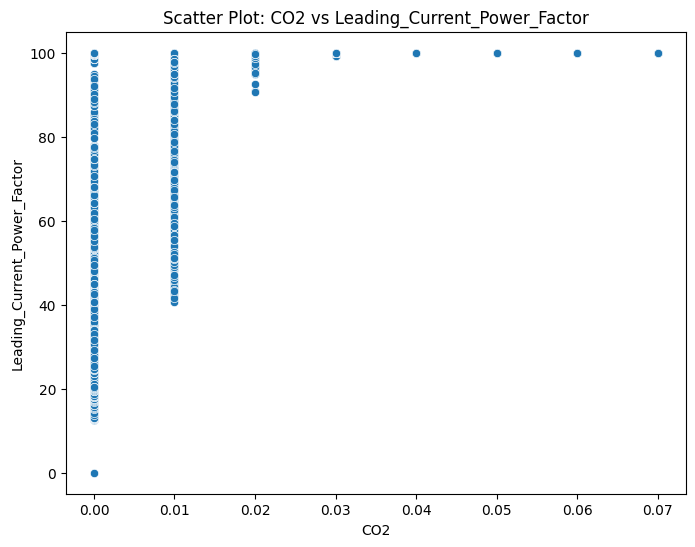

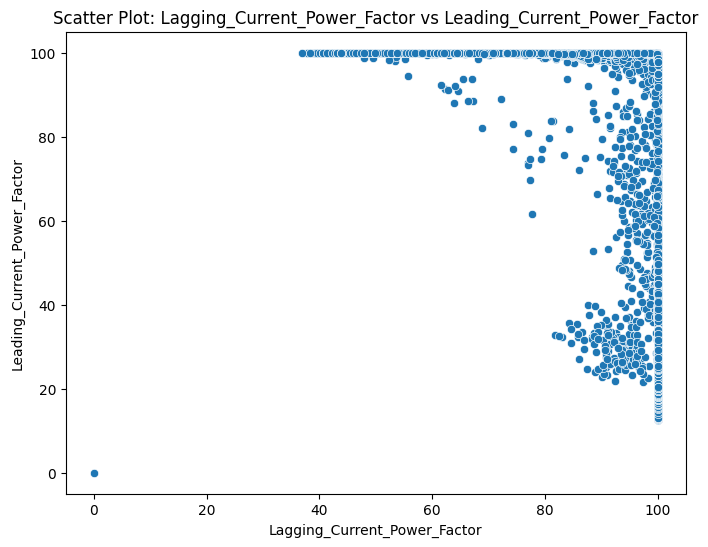

In [14]:
# Bivariate Analysis: Numerical vs. Numerical
for i in range(len(numerical_cols)):
    for j in range(i + 1, len(numerical_cols)):
        x = numerical_cols[i]
        y = numerical_cols[j]
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df, x=x, y=y)
        plt.title(f'Scatter Plot: {x} vs {y}')
        plt.show()

### **Multivariate Analysis**

In [15]:
# Correlation matrix for numerical features
corr_matrix = df[numerical_cols].corr()
print(corr_matrix)


                                      Usage_kWh  \
Usage_kWh                              1.000000   
Lagging_Current_Reactive_Power_kVarh   0.896150   
Leading_Current_Reactive_Power_kVarh  -0.324922   
CO2                                    0.988180   
Lagging_Current_Power_Factor           0.385960   
Leading_Current_Power_Factor           0.353566   

                                      Lagging_Current_Reactive_Power_kVarh  \
Usage_kWh                                                         0.896150   
Lagging_Current_Reactive_Power_kVarh                              1.000000   
Leading_Current_Reactive_Power_kVarh                             -0.405142   
CO2                                                               0.886948   
Lagging_Current_Power_Factor                                      0.144534   
Leading_Current_Power_Factor                                      0.407716   

                                      Leading_Current_Reactive_Power_kVarh  \
Usage_kWh        

Usage_kWh has a strong positive correlation with CO2 (0.988) and Lagging_Current_Reactive_Power_kVarh (0.896), indicating that higher energy usage is closely associated with increased CO2 emissions and lagging reactive power.

Leading_Current_Reactive_Power_kVarh shows a significant negative correlation with Leading_Current_Power_Factor (-0.944), suggesting an inverse relationship between these variables.

Lagging_Current_Power_Factor has weak correlations with most features, indicating limited impact on other variables.

These correlations provide insight into how energy usage and power factors interact with reactive power and CO2 emissions.

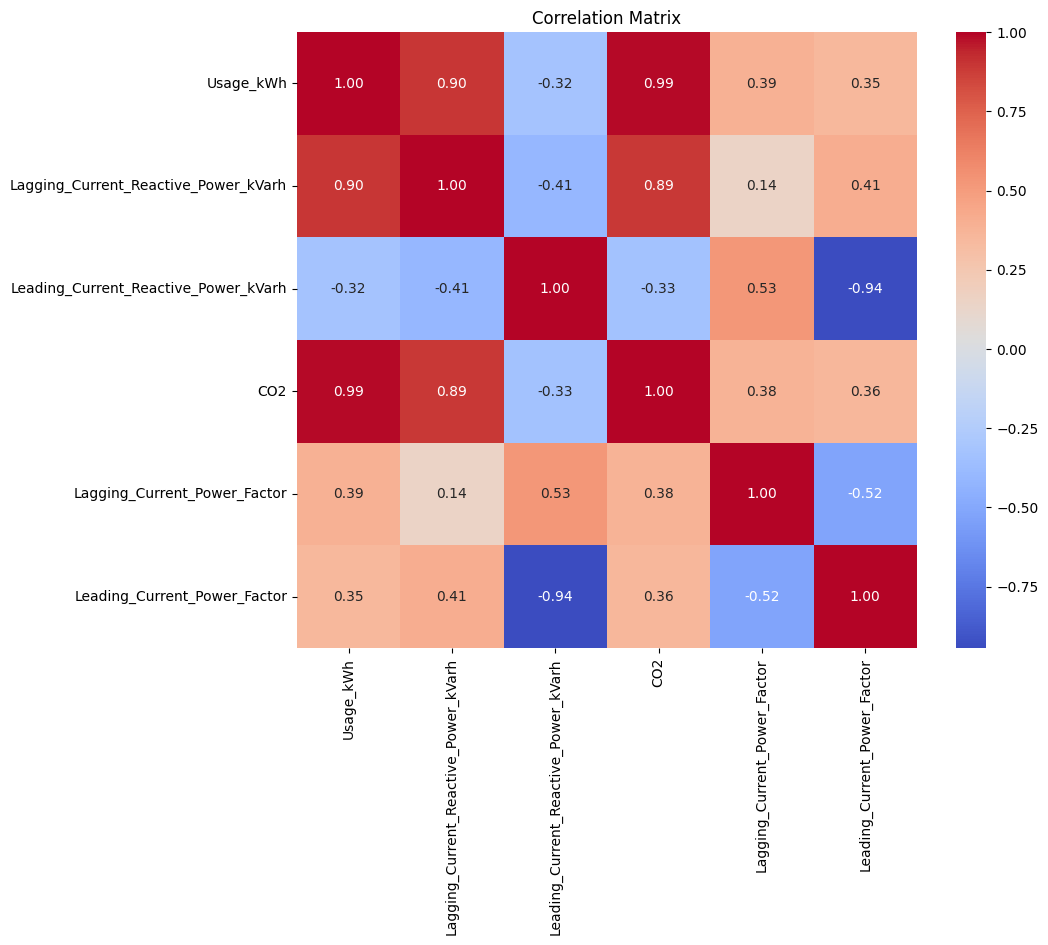

In [16]:
# Heatmap visualization
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


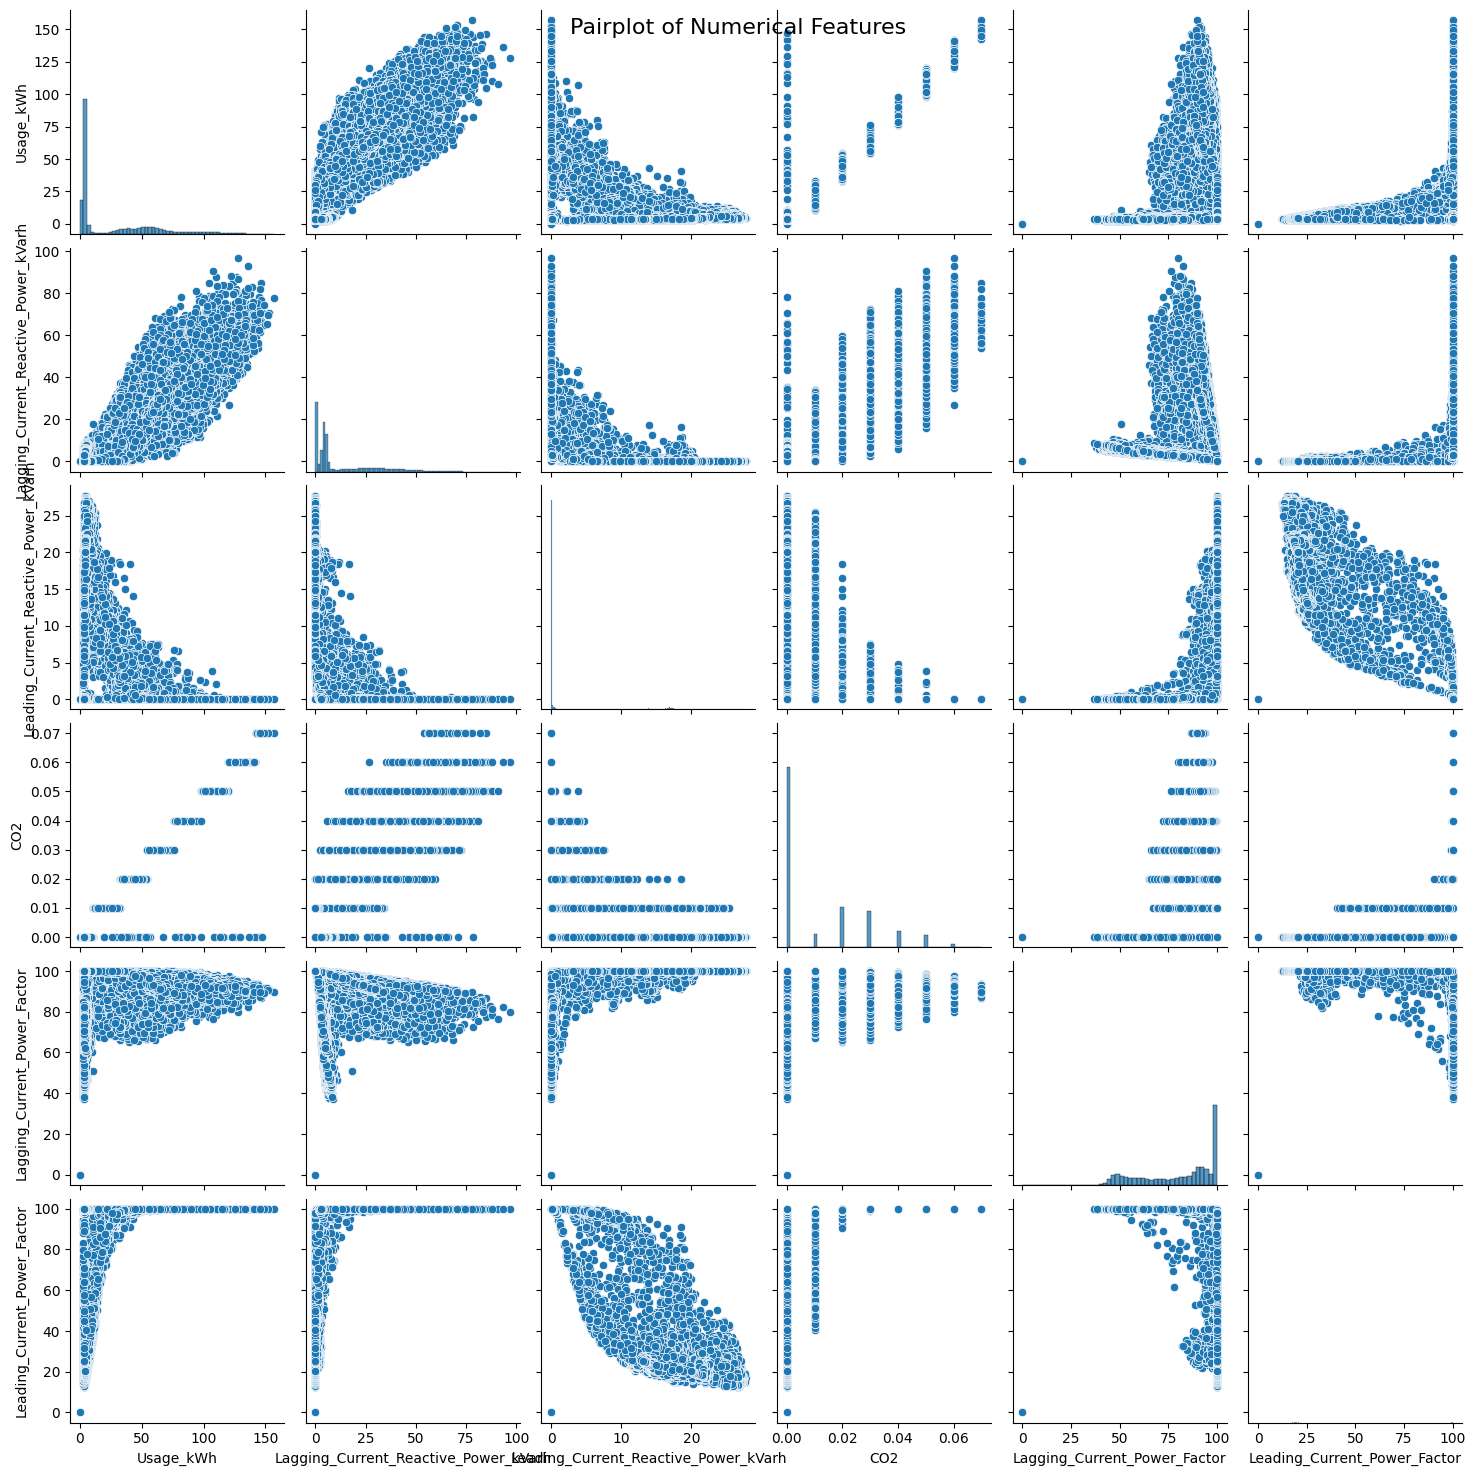

In [17]:
#Pair Plot
sns.pairplot(df[numerical_cols])
plt.suptitle('Pairplot of Numerical Features', size=16)
plt.show()


## **Handling Outliers**

In [18]:
from scipy.stats import zscore

In [19]:
z_scores = df[numerical_cols].apply(zscore)

# Identify outliers
outliers_zscore = {}
threshold = 3
for col in numerical_cols:
    outliers_zscore[col] = df[(z_scores[col] > threshold) | (z_scores[col] < -threshold)]

# Print outliers for each column
for col, outlier_data in outliers_zscore.items():
    print(f"Outliers in {col}:\n", outlier_data)

Outliers in Usage_kWh:
                    date  Usage_kWh  Lagging_Current_Reactive_Power_kVarh  \
140    02-01-2018 11:15     128.52                                 70.85   
141    02-01-2018 11:30     144.47                                 78.48   
153    02-01-2018 14:30     129.10                                 53.50   
155    02-01-2018 15:00     143.89                                 60.91   
157    02-01-2018 15:30     141.44                                 62.57   
...                 ...        ...                                   ...   
33836  19-12-2018 11:15     140.80                                 69.77   
33848  19-12-2018 14:15     149.18                                 74.56   
33851  19-12-2018 15:00     145.22                                 70.67   
33853  19-12-2018 15:30     130.46                                 60.23   
33856  19-12-2018 16:15     133.56                                 64.40   

       Leading_Current_Reactive_Power_kVarh   CO2  \
140       

## **Binning**

In [20]:
# Define bins and labels for binning
bins = [0,15, 35, 85, 100]
labels = [1,5,2,10]

# Apply binning to the 'Leading_Current_Power_Factor' column
df['Power_Factor_Bin'] = pd.cut(df['Leading_Current_Power_Factor'], bins=bins, labels=labels, include_lowest=True)

print(df[['Leading_Current_Power_Factor', 'Power_Factor_Bin']].head(50))


    Leading_Current_Power_Factor Power_Factor_Bin
0                         100.00               10
1                         100.00               10
2                         100.00               10
3                         100.00               10
4                         100.00               10
5                         100.00               10
6                         100.00               10
7                         100.00               10
8                         100.00               10
9                         100.00               10
10                        100.00               10
11                        100.00               10
12                        100.00               10
13                        100.00               10
14                        100.00               10
15                        100.00               10
16                        100.00               10
17                        100.00               10
18                        100.00               10


In [21]:
df['Power_Factor_Bin'].isna().sum()

0

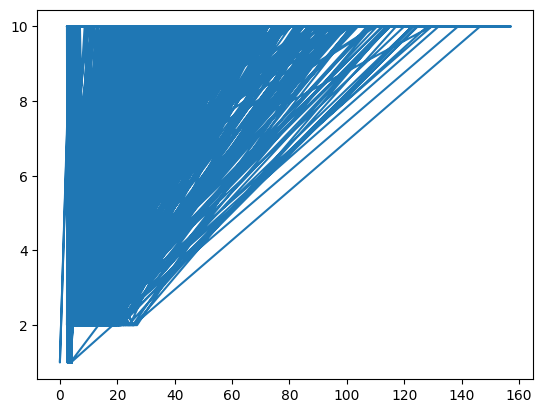

In [22]:
x=df['Usage_kWh']
plt.plot(x,df['Power_Factor_Bin'])

## **Encoding**

In [23]:
# Drop the 'Day_of_week' column from the dataset
df = df.drop(columns=['Day_of_week'])

print(df.head())


               date  Usage_kWh  Lagging_Current_Reactive_Power_kVarh  \
0  01-01-2018 00:15       3.17                                  2.95   
1  01-01-2018 00:30       4.00                                  4.46   
2  01-01-2018 00:45       3.24                                  3.28   
3  01-01-2018 01:00       3.31                                  3.56   
4  01-01-2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2  Lagging_Current_Power_Factor  \
0                                   0.0  0.0                         73.21   
1                                   0.0  0.0                         66.77   
2                                   0.0  0.0                         70.28   
3                                   0.0  0.0                         68.09   
4                                   0.0  0.0                         64.72   

   Leading_Current_Power_Factor   NSM WeekStatus   Load_Type Power_Factor_Bin  
0                 

In [24]:
from sklearn.preprocessing import LabelEncoder

# One-hot encoding for 'WeekStatus' column
df = pd.get_dummies(df, columns=['WeekStatus'], prefix='WeekStatus')

# Label encoding for 'Load_Type' column
label_encoder = LabelEncoder()
df['Load_Type_Encoded'] = label_encoder.fit_transform(df['Load_Type'])

In [25]:
df

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type,Power_Factor_Bin,WeekStatus_Weekday,WeekStatus_Weekend,Load_Type_Encoded
0,01-01-2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Light_Load,10,True,False,0
1,01-01-2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Light_Load,10,True,False,0
2,01-01-2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Light_Load,10,True,False,0
3,01-01-2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Light_Load,10,True,False,0
4,01-01-2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Light_Load,10,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,31-12-2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Light_Load,10,True,False,0
35036,31-12-2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Light_Load,10,True,False,0
35037,31-12-2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Light_Load,10,True,False,0
35038,31-12-2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Light_Load,10,True,False,0



## **Model Training**


In [26]:
#Indexing date
df = df.set_index('date')

#Handling categorical data
df = pd.get_dummies(df, drop_first = True)
df.head()

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus_Weekday,WeekStatus_Weekend,Load_Type_Encoded,Load_Type_Maximum_Load,Load_Type_Medium_Load,Power_Factor_Bin_5,Power_Factor_Bin_2,Power_Factor_Bin_10
date,,,,,,,,,,,,,,,
01-01-2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,True,False,0,False,False,False,False,True
01-01-2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,True,False,0,False,False,False,False,True
01-01-2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,True,False,0,False,False,False,False,True
01-01-2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,True,False,0,False,False,False,False,True
01-01-2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,True,False,0,False,False,False,False,True


In [27]:
#Splitting data set
from sklearn.model_selection import train_test_split
X = df.drop('Usage_kWh', axis = 1)
y = df['Usage_kWh']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [28]:
X_train

,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus_Weekday,WeekStatus_Weekend,Load_Type_Encoded,Load_Type_Maximum_Load,Load_Type_Medium_Load,Power_Factor_Bin_5,Power_Factor_Bin_2,Power_Factor_Bin_10
date,,,,,,,,,,,,,,
27-01-2018 14:15,0.00,8.46,0.01,100.00,95.98,51300,False,True,2,False,True,False,False,True
24-11-2018 00:00,2.30,0.07,0.00,79.56,99.97,0,False,True,0,False,False,False,False,True
17-01-2018 18:00,0.04,9.07,0.02,100.00,96.38,64800,True,False,1,True,False,False,False,True
21-11-2018 22:45,3.56,0.00,0.00,73.77,100.00,81900,True,False,1,True,False,False,False,True
01-10-2018 05:30,6.30,0.00,0.00,48.14,100.00,19800,True,False,0,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23-03-2018 09:30,51.30,0.00,0.06,92.28,100.00,34200,True,False,2,False,True,False,False,True
05-12-2018 16:00,47.12,0.00,0.05,91.37,100.00,57600,True,False,2,False,True,False,False,True
24-02-2018 02:15,4.72,0.00,0.00,78.49,100.00,8100,False,True,0,False,False,False,False,True


In [29]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Initialize and fit the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on the test set
y_pred = lr.predict(X_test)

# Calculate R²
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R²
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Print the results
print(f"R² Score for Linear Regression: {r2:.4f}")
print(f"Adjusted R² Score for Linear Regression: {adjusted_r2:.4f}")


R² Score for Linear Regression: 0.9834
Adjusted R² Score for Linear Regression: 0.9833


In [30]:
import xgboost as xgb
from sklearn.metrics import r2_score

#XGBoost regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)

# Train the model
xg_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = xg_reg.predict(X_test)

# Calculate R²
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R²
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Display the results
print(f"R²: {r2:.4f}")
print(f"Adjusted R²: {adjusted_r2:.4f}")


R²: 0.9971
Adjusted R²: 0.9971


# **VERSION-2**

### **Finding the Line Equation**

In [31]:
# Retrieve coefficients and intercept
coefficients = lr.coef_  # Array of coefficients for each feature (m)
intercept = lr.intercept_  # Intercept (c)

# Display the equation for each feature
print("Linear Regression Equation:")
for feature, coef in zip(X_train.columns, coefficients):
    print(f"{feature}: y = {coef:.4f}x + {intercept:.4f}")


Linear Regression Equation:
Lagging_Current_Reactive_Power_kVarh: y = 0.3358x + -11.3417
Leading_Current_Reactive_Power_kVarh: y = 0.0458x + -11.3417
CO2: y = 1628.5434x + -11.3417
Lagging_Current_Power_Factor: y = 0.1285x + -11.3417
Leading_Current_Power_Factor: y = -0.0192x + -11.3417
NSM: y = -0.0000x + -11.3417
WeekStatus_Weekday: y = -0.0112x + -11.3417
WeekStatus_Weekend: y = 0.0112x + -11.3417
Load_Type_Encoded: y = 0.9223x + -11.3417
Load_Type_Maximum_Load: y = 0.5633x + -11.3417
Load_Type_Medium_Load: y = 0.1795x + -11.3417
Power_Factor_Bin_5: y = 1.3877x + -11.3417
Power_Factor_Bin_2: y = 1.8965x + -11.3417
Power_Factor_Bin_10: y = 7.2641x + -11.3417


## **Insights from the line equation:**



1. Look for features with higher coefficients (𝑚) to understand which factors most impact the target (e.g., energy usage).
2. Positive coefficients indicate a direct relationship with the target variable.

3. Negative coefficients indicate an inverse relationship.

### **Optimization Suggestions:**

*  Focus on features with high positive coefficients to reduce their impact (e.g., optimize energy usage or emissions).
*   Adjust controllable variables (e.g., scheduling loads or improving power factors) to minimize costs or energy.




In [32]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge = Ridge(alpha=1.0)  # Alpha is the regularization strength
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

# Calculate R² and Adjusted R² for Ridge
ridge_r2 = r2_score(y_test, ridge_pred)
n = X_test.shape[0]
p = X_test.shape[1]
ridge_adjusted_r2 = 1 - ((1 - ridge_r2) * (n - 1) / (n - p - 1))

print(f"R² for Ridge Regression: {ridge_r2:.4f}")
print(f"Adjusted R² for Ridge Regression: {ridge_adjusted_r2:.4f}")

# Lasso Regression
lasso = Lasso(alpha=0.1)  # Alpha is the regularization strength
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

# Calculate R² and Adjusted R² for Lasso
lasso_r2 = r2_score(y_test, lasso_pred)
lasso_adjusted_r2 = 1 - ((1 - lasso_r2) * (n - 1) / (n - p - 1))

print(f"R² for Lasso Regression: {lasso_r2:.4f}")
print(f"Adjusted R² for Lasso Regression: {lasso_adjusted_r2:.4f}")


R² for Ridge Regression: 0.9568
Adjusted R² for Ridge Regression: 0.9567
R² for Lasso Regression: 0.9171
Adjusted R² for Lasso Regression: 0.9170


### **Evaluating metrics for train and test dataset**

In [33]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

# Linear Regression
lr_train_r2 = lr.score(X_train, y_train)
lr_test_r2 = lr.score(X_test, y_test)

# Ridge Regression
ridge_train_r2 = ridge.score(X_train, y_train)
ridge_test_r2 = ridge.score(X_test, y_test)

# Lasso Regression
lasso_train_r2 = lasso.score(X_train, y_train)
lasso_test_r2 = lasso.score(X_test, y_test)

# Print Results
print("Linear Regression Training R²:", lr_train_r2)
print("Linear Regression Test R²:", lr_test_r2)
print("Ridge Regression Training R²:", ridge_train_r2)
print("Ridge Regression Test R²:", ridge_test_r2)
print("Lasso Regression Training R²:", lasso_train_r2)
print("Lasso Regression Test R²:", lasso_test_r2)


Linear Regression Training R²: 0.9792647269313549
Linear Regression Test R²: 0.9833624258736735
Ridge Regression Training R²: 0.9564306604887851
Ridge Regression Test R²: 0.956790785458312
Lasso Regression Training R²: 0.9184607116749203
Lasso Regression Test R²: 0.9170615144268336


### **Handling Outliers by applying transformations**

In [34]:
data = pd.read_csv('/content/Steel_industry_data.csv')
data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [35]:
data = data.rename(columns = {'Lagging_Current_Reactive.Power_kVarh' : 'Lagging_Current_Reactive_Power_kVarh', 'CO2(tCO2)' : 'CO2'})
data

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


In [36]:
# Calculate z-scores for numerical columns
z_scores = df[numerical_cols].apply(zscore)

# Identify outliers using a threshold
threshold = 3
outliers_zscore = {}
for col in numerical_cols:
    outliers_zscore[col] = df[(z_scores[col] > threshold) | (z_scores[col] < -threshold)]

# Apply transformations to handle outliers
for col in numerical_cols:
    # Log Transformation for skewed data
    if (df[col] > 0).all():  # Log is valid only for positive values
        df[f"{col}_log"] = np.log1p(df[col])  # log1p handles zero gracefully

    # Square Root Transformation for moderately skewed data
    df[f"{col}_sqrt"] = np.sqrt(df[col].clip(lower=0))  # Ensure non-negative values for sqrt

    # Capping extreme values
    upper_limit = df[col].quantile(0.95)
    lower_limit = df[col].quantile(0.05)
    df[f"{col}_capped"] = df[col].clip(lower=lower_limit, upper=upper_limit)

# Display the transformed columns to verify
print(df.head())


                  Usage_kWh  Lagging_Current_Reactive_Power_kVarh  \
date                                                                
01-01-2018 00:15       3.17                                  2.95   
01-01-2018 00:30       4.00                                  4.46   
01-01-2018 00:45       3.24                                  3.28   
01-01-2018 01:00       3.31                                  3.56   
01-01-2018 01:15       3.82                                  4.50   

                  Leading_Current_Reactive_Power_kVarh  CO2  \
date                                                          
01-01-2018 00:15                                   0.0  0.0   
01-01-2018 00:30                                   0.0  0.0   
01-01-2018 00:45                                   0.0  0.0   
01-01-2018 01:00                                   0.0  0.0   
01-01-2018 01:15                                   0.0  0.0   

                  Lagging_Current_Power_Factor  Leading_Current_Power_Fact